# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [2]:
import urllib.request
import os
import zipfile
import os

def download_data(force=False):
    """Download and extract course data from Zenodo."""

    zip_path = 'data.zip'
    data_dir = './data'

    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/18235955/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")

    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")

    return data_dir


if __name__ == "__main__":
    download_data()


Download complete
Extracting data files...
Data extracted


In [3]:
os.listdir()


['.config', 'data.zip', 'data', 'sample_data']

In [4]:
os.listdir("data")

['zoo.csv',
 'divorce',
 'Effectiveness of Bystander Cardiopulmonary Resuscitation and Survival Following Out-of-Hospital Cardiac Arrest.pdf',
 'craigslist_cville_cars.csv',
 'weapons-trade-register.csv',
 'us_power_consumption.csv',
 'nhanes_meta_17_18.csv',
 '2022 election cycle fundraising.csv',
 'SIPRI Military Expenditure Database.csv',
 'nhanes_data_17_18.csv',
 'mammogram.txt',
 'craiglist_cville_cars_long.csv',
 'USA_cars_datasets.csv',
 'use_of_force.txt',
 'cars_env.csv',
 'ames_codebook.txt',
 'pretrial_data.csv',
 'sharks.csv',
 'mn_police_use_of_force.csv',
 'corporate_ratings.csv',
 'iowa.csv',
 'energy.csv',
 'pierce_county_house_sales.csv',
 'airbnb_NYC.csv',
 'wages_hw.csv',
 'tech_stocks.csv',
 'heart_failure_readme.txt',
 'crimebystatecombinedwithunemployment.csv',
 'VirginiaPretrialData2017Codebook.pdf',
 'heart_failure_clinical_records_dataset.csv',
 'justice_data.parquet',
 'patents.csv',
 'tuna.csv',
 'time_use.csv',
 'land_mines.csv',
 'drilling_rigs.csv',
 'cvi

In [7]:
import pandas as pd

# Load Airbnb data
airbnb = pd.read_csv("data/airbnb_NYC.csv", encoding="latin-1")

# Clean price variable
airbnb["price_clean"] = (
    airbnb["Price"]
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
)

In [8]:
# Count missing values
airbnb["price_clean"].isna().sum()


np.int64(0)

1.1 The price variable was stored as a string because it included dollar signs and commas. I removed the dollar signs and commas before converting the variable to a numeric type. Commas cause prices above $999 to be incorrectly parsed as missing values during conversion. After cleaning and converting the variable to a float, there were 0 missing values in the cleaned price variable.

In [9]:
# Load MN police use of force data
mn = pd.read_csv("data/mn_police_use_of_force.csv")

# Clean subject_injury
mn["subject_injury_clean"] = (
    mn["subject_injury"]
    .astype(str)
    .str.strip()
    .str.lower()
    .map({"yes": "Yes", "no": "No"})
)

In [10]:
# Proportion missing
prop_missing = mn["subject_injury_clean"].isna().mean()
prop_missing


np.float64(0.7619342359767892)

In [11]:
# Cross-tabulate with force type
injury_crosstab = pd.crosstab(
    mn["subject_injury_clean"],
    mn["force_type"],
    dropna=False
)

injury_crosstab


force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury_clean,,,,,,,,,,,
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172
NaN,2,7051,1421,0,27,74,87,0,170,31,985


In [12]:
mn["subject_injury_clean"] = mn["subject_injury_clean"].fillna("Missing")

1.2 I cleaned the subject_injury variable by standardizing values and mapping them to “Yes” and “No.” Approximately 76% of the observations are missing injury information. A cross-tabulation with force type shows that missing values are concentrated in certain force types, such as bodily force and chemical irritants, suggesting that injury reporting is not random. I replaced the remaining missing values with the label “Missing.”

In [13]:
import pandas as pd

# Load METABRIC data
metabric = pd.read_csv("data/metabric.csv")

# Create dummy variable for survival status
# 0 = Deceased, 1 = Living
metabric["survival_dummy"] = metabric["Overall Survival Status"].map({
    "1:DECEASED": 0,
    "0:LIVING": 1
})

# Check result
metabric["survival_dummy"].value_counts()


,count
survival_dummy,
0,768
1,575


In [14]:
missing_reviews = airbnb["Review Scores Rating"].isna().sum()
missing_reviews

np.int64(8323)

In [15]:
# Compute median of non-missing values
median_review_score = airbnb["Review Scores Rating"].median()

# Create new variable with median imputation
airbnb["Review_Scores_Rating_imputed"] = airbnb["Review Scores Rating"].fillna(
    median_review_score
)

# Check that missing values are now filled
airbnb["Review_Scores_Rating_imputed"].isna().sum()

np.int64(0)

1.4 There are 8323 missing values in the Review Scores Rating Variable. Median imputation may bias results because it reduces variability in the data and assumes that listings with missing review scores are similar to typical listings. If missing values are related to listing quality or lack of reviews, this approach could distort relationships involving review scores.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [18]:
import pandas as pd

# Load shark attack data (Excel file)
shark = pd.read_excel("data/GSAF5.xls")

# Preview data
shark.head()


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19th January,2026.0,Unprovoked,Australia,NSW,North Steyne,Surfing,Andre de Ruyter,M,27,...,5m shark species not determined,9 News: Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18th January,2026.0,Unprovoked,Australia,NSW,Nielsen Park Vaucluse Sydney Harbour,Jumping off rocks,Nico Antic,M,12,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10th January,2026.0,Unprovoked,Australia,NSW,Avalon Beach,Surfing,Paul Stanton,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2.1 The shark attack dataset is provided as an Excel (.xls) file rather than a CSV, so pd.read_csv() does not work. Instead, I used pd.read_excel() to successfully load the data into Pandas.

In [19]:
# Drop columns that contain no data at all
shark_clean = shark.dropna(axis=1, how="all")


In [20]:
shark.columns[shark.isna().all()]


Index([], dtype='object')

In [21]:
shark.shape, shark_clean.shape


((7070, 23), (7070, 23))

In [22]:
shark_clean.head()


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19th January,2026.0,Unprovoked,Australia,NSW,North Steyne,Surfing,Andre de Ruyter,M,27,...,5m shark species not determined,9 News: Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18th January,2026.0,Unprovoked,Australia,NSW,Nielsen Park Vaucluse Sydney Harbour,Jumping off rocks,Nico Antic,M,12,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10th January,2026.0,Unprovoked,Australia,NSW,Avalon Beach,Surfing,Paul Stanton,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2.3 An observation in this dataset is a single shark attack incident, with each row representing one recorded event. This is justified because the rows are organized by case number and date, and all variables describe details of the same incident. Defining an observation this way affects cleaning and analysis decisions by prioritizing the preservation of rows, since dropping rows would remove entire incidents. As a result, cleaning focused on removing columns with no data rather than deleting observations, ensuring analyses accurately reflect the number and characteristics of shark attack events.

In [24]:
shark_clean["Year_clean"] = pd.to_numeric(
    shark_clean["Year"], errors="coerce"
)


In [25]:
shark_clean["Year_clean"].min(), shark_clean["Year_clean"].max()


(0.0, 2026.0)

In [26]:
shark_clean = shark_clean[shark_clean["Year_clean"] > 0]


In [27]:
shark_clean["Year_clean"].min(), shark_clean["Year_clean"].max()

(5.0, 2026.0)

In [28]:
shark_1940 = shark_clean[shark_clean["Year_clean"] >= 1940]


In [30]:
attacks_per_year = (
    shark_1940.groupby("Year_clean")
    .size()
)
attacks_per_year


,0
Year_clean,
1940.0,24
1941.0,27
1942.0,41
1943.0,28
1944.0,31
...,...
2022.0,98
2023.0,109
2024.0,52


2.8 After cleaning the Year variable and filtering to attacks since 1940, the number of recorded shark attacks increases over time. Early years show fewer than 40 attacks annually, while recent years exceed 90 per year, indicating an overall upward trend.

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

3.1 The paper is about data tidying, which is a core part of data cleaning that focuses on structuring datasets so they are easy to manipulate, model, and visualize. Wickham argues that tidy data reduces effort, supports better tools, and allows analysts to focus on substantive questions instead of formatting.

3.2 The tidy data. standard provides a consistent way to organize data values so that analysis tools can work together smoothly. It aims to reduce repeated, ad-hoc data reshaping and make data exploration analysis, and tool development more efficient.

3.3 “Like families, tidy datasets are all alike but every messy dataset is messy in its own way" means that the tidy datasets follow the same simple structural rules, while messy datases vary widely in structure, making them harder to work consistently.

“For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general" means that while variables and observations are often clear within a specific dataset, there is no universal definition that works for all datasets or all analytical goals.

3.4 This is how Wickham defines:

Values: individual data entries (numbers or strings)
Variables: Attributes being measured (columns)
Observations: measurements collected on the same unit (rows)

3.5 This is how Tidy Data is defined:

A detaset is tidy if each variable is a column, each observation is a row, and each type of observaitonal unit is stored in its own table

3.6 The 5 most common problems with messy data sets are:

1. Column headers are values, not variable names
2. Multiple variables are stored in one column
3. Variables are stored in both rows and columns
4. Multiple types of observational units are in one table
5. One observational unit is spread across multiple tables

Table 4 is messy because income categories appear as column headers, which are values rather than variable names. This violates tidy data principles

Melting converts columns into rows by turning column headers into values, producing a long (molten) format that clearly separates variables and observations

3.7 Table 11 is messy because variables are stored across both rows and columns, and the element column contains variable names instead of values. Table 12 is tidy because each variable (like tmin, tmx) has its own column and each row represents a single day's observation

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

gifts = pd.read_csv("data/ForeignGifts_edu.csv")
gifts.head()


,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


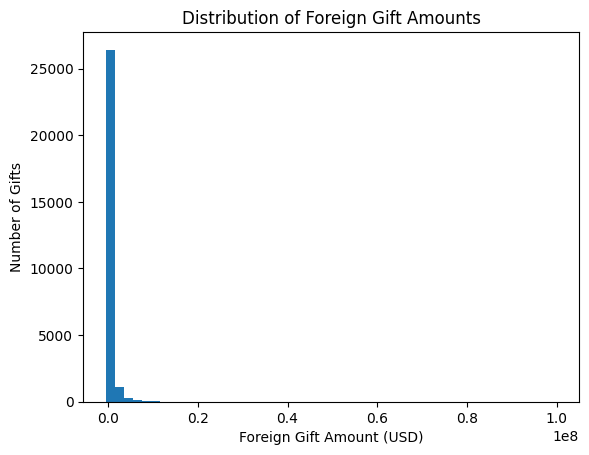

In [32]:
plt.hist(gifts["Foreign Gift Amount"], bins=50)
plt.xlabel("Foreign Gift Amount (USD)")
plt.ylabel("Number of Gifts")
plt.title("Distribution of Foreign Gift Amounts")
plt.show()

4.2 The histogram of foreign gift amounts is highly right-skewed. Most gifts are relatively small, with a large concentration near zero, while a small number of very large gifts extend far to the right. This indicates that foreign funding to U.S. universities is dominated by a few high-value transfers rather than evenly distributed across gifts.

In [33]:
gift_type_counts = gifts["Gift Type"].value_counts()
gift_type_props = gift_type_counts / gift_type_counts.sum()

gift_type_counts, gift_type_props

(Gift Type
 Contract         17274
 Monetary Gift    10936
 Real Estate         11
 Name: count, dtype: int64,
 Gift Type
 Contract         0.612097
 Monetary Gift    0.387513
 Real Estate      0.000390
 Name: count, dtype: float64)

4.3 Contracts make up the majority of foreign gifts to U.S. universities, accounting for approximately 61% of all gifts. Monetary gifts represent about 39% of the total, while real estate gifts are extremely rare, comprising less than 0.1% of all foreign gifts. This suggests that foreign financial relationships with U.S. universities are primarily structured through contractual agreements rather than property transfers.

In [35]:
# Top 15 countries by number of gifts
top_countries_count = (
    gifts
    .groupby("Country of Giftor")
    .size()
    .sort_values(ascending=False)
    .head(15)
)

top_countries_count


,0
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [37]:
top_countries_amount = (
    gifts
    .groupby("Country of Giftor")["Foreign Gift Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

top_countries_amount


,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


In [38]:
top_institutions = (
    gifts
    .groupby("Institution Name")["Foreign Gift Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

top_institutions


,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


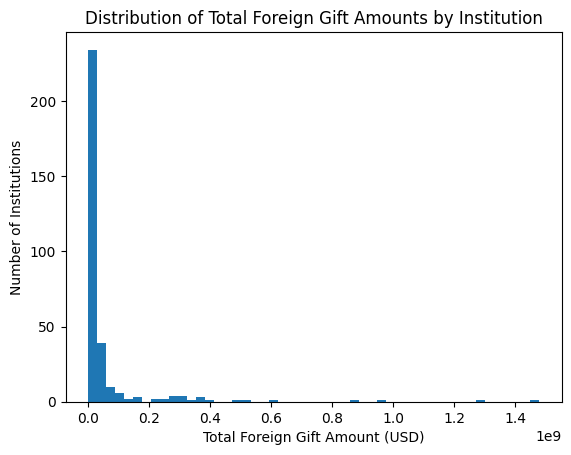

In [39]:
institution_totals = (
    gifts
    .groupby("Institution Name")["Foreign Gift Amount"]
    .sum()
)

plt.hist(institution_totals, bins=50)
plt.xlabel("Total Foreign Gift Amount (USD)")
plt.ylabel("Number of Institutions")
plt.title("Distribution of Total Foreign Gift Amounts by Institution")
plt.show()


In [43]:
# Top giftors by total amount given
top_giftors_amount = (
    gifts
    .groupby("Giftor Name")["Foreign Gift Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

top_giftors_amount


,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


4.6 The giftors providing the most money in total are primarily large foreign foundations and government-affiliated organizations. The Qatar Foundation is the single largest contributor, followed by related Qatari research and education entities. Other major contributors include Saudi Arabian cultural and governmental organizations, as well as a small number of large institutional and anonymous donors. This indicates that foreign funding to U.S.

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

college = pd.read_csv("data/college_completion.csv")
college.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [45]:
college.shape

(3798, 63)

The dataset contains 3,798 observations and 63 variables. Each observation represents a single college or university, and the variables describe institutional characteristics such as level, control type, student aid amounts, and graduation outcomes.

In [46]:
pd.crosstab(college["control"], college["level"])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


5.3 The cross-tabulation of institutional control and level shows clear differences in the structure of higher education. Public institutions are more likely to be 2-year colleges than 4-year colleges, reflecting the prevalence of public community colleges. Private not-for-profit institutions are overwhelmingly 4-year institutions, with very few 2-year schools. Private for-profit institutions are more evenly split between 2-year and 4-year institutions, though slightly more are 4-year. Overall, 2-year colleges are primarily public or for-profit, while 4-year colleges are dominated by public and private not-for-profit institutions.

In [47]:
grad = college["grad_100_value"].dropna()

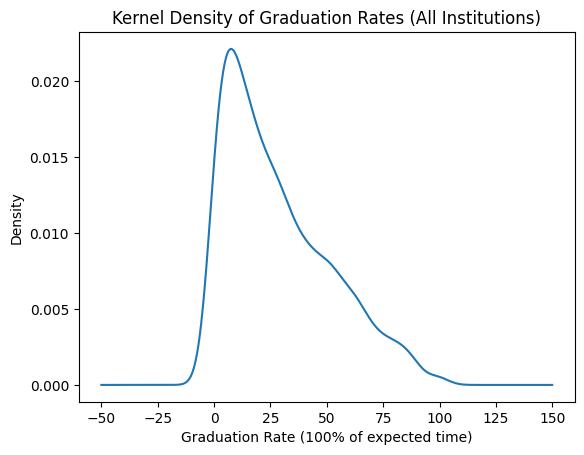

In [48]:
plt.figure()
grad.plot(kind="kde")
plt.xlabel("Graduation Rate (100% of expected time)")
plt.title("Kernel Density of Graduation Rates (All Institutions)")
plt.show()

In [49]:
grad.describe()

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


The kernel density plot of grad_100_value shows a right-skewed distribution, with most institutions clustered at relatively low graduation rates and a long right tail extending toward 100 percent. The descriptive statistics support this pattern: the mean graduation rate is approximately 28 percent, while the median is lower at about 22.5 percent, indicating that high-performing institutions raise the average. Overall, on-time graduation within 100 percent of expected time is relatively uncommon across institutions.

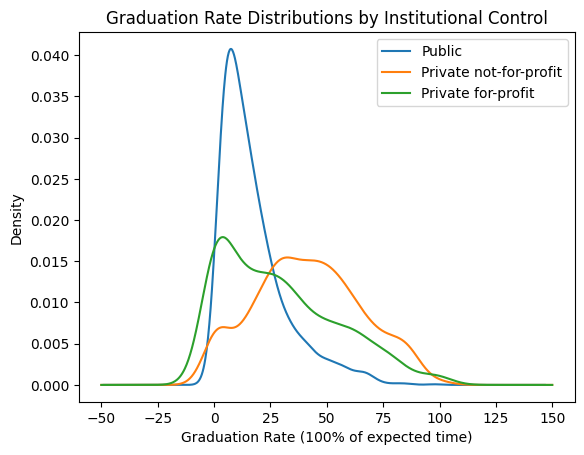

In [50]:
for c in college["control"].dropna().unique():
    subset = college[college["control"] == c]["grad_100_value"].dropna()
    subset.plot(kind="kde", label=c)

plt.xlabel("Graduation Rate (100% of expected time)")
plt.title("Graduation Rate Distributions by Institutional Control")
plt.legend()
plt.show()

In [51]:
college.groupby("control")["grad_100_value"].describe()

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


5.4 Private not-for-profit institutions appear to have the most favorable graduation rates. Their kernel density distribution is shifted to the right compared to public and private for-profit institutions, and they have higher median and upper-quartile graduation rates. Public institutions tend to fall in the middle, while private for-profit institutions show the lowest graduation rates, with a large concentration near zero.

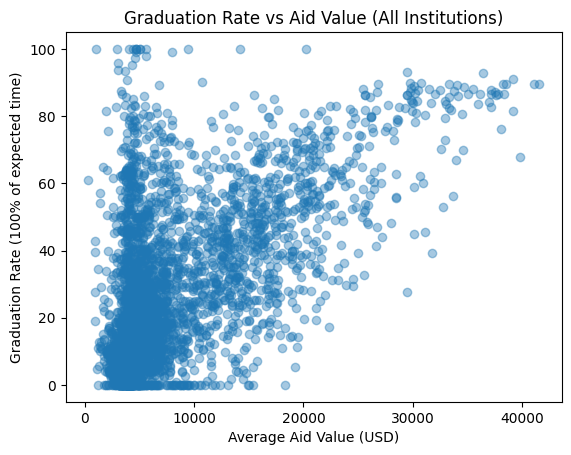

(np.float64(88610.48316902434), np.float64(0.5758792845936073))

In [52]:
# Drop missing values
subset = college[["aid_value", "grad_100_value"]].dropna()

# Scatterplot
plt.scatter(subset["aid_value"], subset["grad_100_value"], alpha=0.4)
plt.xlabel("Average Aid Value (USD)")
plt.ylabel("Graduation Rate (100% of expected time)")
plt.title("Graduation Rate vs Aid Value (All Institutions)")
plt.show()

# Covariance and correlation
cov = subset["aid_value"].cov(subset["grad_100_value"])
corr = subset["aid_value"].corr(subset["grad_100_value"])

cov, corr

5.5 The scatterplot indicates a moderately strong positive relationship between average aid value and graduation rates. Institutions offering higher levels of student aid tend to have substantially higher graduation rates. This pattern is confirmed by a positive covariance and a correlation of approximately 0.58, suggesting that aid and graduation outcomes move together overall.

Public
Covariance: 15355.146211760217
Correlation: 0.4824810458983382

Private not-for-profit
Covariance: 109274.12333702881
Correlation: 0.6015909241488573

Private for-profit
Covariance: 6897.524957237808
Correlation: 0.1883627008424557



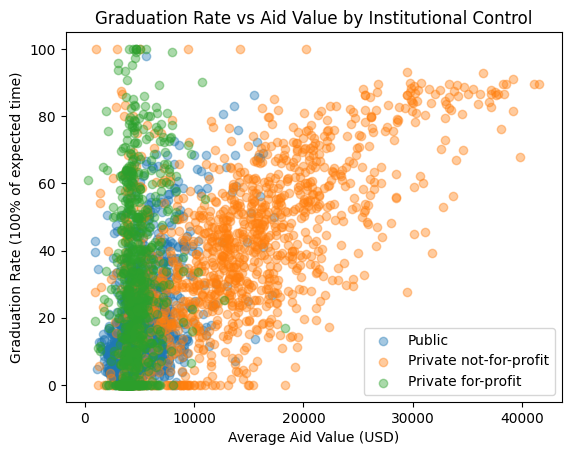

In [53]:
for c in college["control"].dropna().unique():
    sub = college[college["control"] == c][["aid_value", "grad_100_value"]].dropna()

    plt.scatter(sub["aid_value"], sub["grad_100_value"], alpha=0.4, label=c)

    print(c)
    print("Covariance:", sub["aid_value"].cov(sub["grad_100_value"]))
    print("Correlation:", sub["aid_value"].corr(sub["grad_100_value"]))
    print()

plt.xlabel("Average Aid Value (USD)")
plt.ylabel("Graduation Rate (100% of expected time)")
plt.title("Graduation Rate vs Aid Value by Institutional Control")
plt.legend()
plt.show()


5.5 The scatterplot of graduation rate versus average aid value shows a moderate positive relationship across all institutions, with higher aid generally associated with higher graduation rates. This is confirmed by a positive covariance and a correlation of approximately 0.58.

When conditioning on institutional control, the relationship differs substantially. Private not-for-profit institutions exhibit the strongest positive relationship between aid and graduation rates (correlation ≈ 0.60), indicating that increased aid is strongly associated with improved graduation outcomes. Public institutions show a moderate positive relationship (correlation ≈ 0.48), while private for-profit institutions show only a weak association (correlation ≈ 0.18).

Overall, aid appears to vary most positively with graduation rates at private not-for-profit institutions, somewhat at public institutions, and very little at private for-profit institutions.

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

ames = pd.read_csv("data/ames_prices.csv")
ames.head()


,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
